In [84]:
import findspark
findspark.init()
findspark.find()

'C:\\Program Files\\Spark\\spark-3.2.1-bin-hadoop3.2'

In [85]:
# Import PySpark
from pyspark.sql import SparkSession

In [86]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [87]:
from pyspark.sql import SparkSession # required to created a dataframe
spark=SparkSession.builder.appName("Basics").getOrCreate()

import pandas as pd
import numpy as np
import time
import pyspark.sql.functions
import pyspark.sql.types
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import round
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf

In [88]:
# read csv file
df = spark.read.csv("C:/Users/anjun/.vscode/netflix_titles.csv", header=True, inferSchema=True)
df.show()

+-------+-------+--------------------+--------------------+--------------------+-------------+--------------+--------------------+----------+------------------+------------+------+---------+--------------------+----+
|show_id|   type|               title|            director|                cast|        Genre| country_split|             country|      date|        date_added|release_year|rating| duration|           listed_in|_c14|
+-------+-------+--------------------+--------------------+--------------------+-------------+--------------+--------------------+----------+------------------+------------+------+---------+--------------------+----+
|      1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|Documentaries| United States|       United States|25/09/2021|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|null|
|      2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|International|  South Africa|        South Africa|24

In [89]:
#print schema
df.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- country_split: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- _c14: string (nullable = true)



In [90]:
# print column names
df.columns

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'Genre',
 'country_split',
 'country',
 'date',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 '_c14']

In [91]:
df=df.dropDuplicates() # drop duplicate rows
df.count()

8808

In [92]:
print(df.count())

8808


In [93]:
# print in proper format all the data

Describe_table=df.describe() # calculate summary statistics
Describe_table.show(n=5,truncate=True)

+-------+------------------+-------------+---------------------------------+--------------------+--------------------+----------------+-------------+---------------+--------------+-------------+-----------------+----------------+--------------------+-------------+------------------+
|summary|           show_id|         type|                            title|            director|                cast|           Genre|country_split|        country|          date|   date_added|     release_year|          rating|            duration|    listed_in|              _c14|
+-------+------------------+-------------+---------------------------------+--------------------+--------------------+----------------+-------------+---------------+--------------+-------------+-----------------+----------------+--------------------+-------------+------------------+
|  count|              8808|         8808|                             8807|                6173|                7983|            8807|         7975

In [95]:
df.groupBy('type','release_year',).count().sort('count', ascending=True).show(10)

+-------+------------+-----+
|   type|release_year|count|
+-------+------------+-----+
|TV Show|        1963|    1|
|TV Show|        1945|    1|
|  Movie|        null|    1|
|  Movie|        1963|    1|
|  Movie|      Action|    1|
|TV Show|        1972|    1|
|TV Show|        1925|    1|
|TV Show|        1967|    1|
|  Movie|  01/11/2020|    1|
|  Movie|        1966|    1|
+-------+------------+-----+
only showing top 10 rows



In [96]:
# Adding a column to the dataframe
#month_added and year_added are the columns to be added

df = df.withColumn("month_added", pyspark.sql.functions.substring(df["date"],3,4)).withColumn("year_added", pyspark.sql.functions.substring(df["date"], 7, 8))
df.show(truncate=True, n=5)

+-------+-----+-------------------+-----------------+--------------------+-----------+--------------+--------------------+----------+---------------+------------+------+--------+--------------------+----+-----------+----------+
|show_id| type|              title|         director|                cast|      Genre| country_split|             country|      date|     date_added|release_year|rating|duration|           listed_in|_c14|month_added|year_added|
+-------+-----+-------------------+-----------------+--------------------+-----------+--------------+--------------------+----------+---------------+------------+------+--------+--------------------+----+-----------+----------+
|    191|Movie|         Thimmarusu|Sharan Koppisetty|Satya Dev, Priyan...|     Dramas|         India|               India|28/08/2021|August 28, 2021|        2021| TV-14| 125 min|Dramas, Internati...|null|       /08/|      2021|
|    341|Movie|          Inception|Christopher Nolan|Leonardo DiCaprio...|     Action| U

In [97]:
df.show(5)

+-------+-----+-------------------+-----------------+--------------------+-----------+--------------+--------------------+----------+---------------+------------+------+--------+--------------------+----+-----------+----------+
|show_id| type|              title|         director|                cast|      Genre| country_split|             country|      date|     date_added|release_year|rating|duration|           listed_in|_c14|month_added|year_added|
+-------+-----+-------------------+-----------------+--------------------+-----------+--------------+--------------------+----------+---------------+------------+------+--------+--------------------+----+-----------+----------+
|    191|Movie|         Thimmarusu|Sharan Koppisetty|Satya Dev, Priyan...|     Dramas|         India|               India|28/08/2021|August 28, 2021|        2021| TV-14| 125 min|Dramas, Internati...|null|       /08/|      2021|
|    341|Movie|          Inception|Christopher Nolan|Leonardo DiCaprio...|     Action| U

In [101]:
# Country VS Release Year
from pyspark.sql.functions import count, col, desc

df.groupBy("country_split") \
  .agg(count("release_year").alias("release_count")) \
  .sort(desc("release_count")) \
  .show()

+--------------+-------------+
| country_split|release_count|
+--------------+-------------+
| United States|         3197|
|         India|         1008|
|          null|          832|
|United Kingdom|          628|
|        Canada|          271|
|         Japan|          259|
|        France|          211|
|   South Korea|          211|
|         Spain|          179|
|        Mexico|          134|
|     Australia|          117|
|         Egypt|          112|
|        Turkey|          111|
|       Germany|          103|
|         China|          100|
|       Nigeria|           94|
|        Taiwan|           85|
|     Indonesia|           85|
|        Brazil|           84|
|   Philippines|           80|
+--------------+-------------+
only showing top 20 rows



In [102]:
# Country VS Type : TV Show
from pyspark.sql.functions import count, col, desc

df.filter(col("type") =="TV Show") \
  .groupBy("country_split") \
  .agg(count("release_year").alias("release_count")) \
  .sort(desc("release_count")) \
  .show()



+--------------+-------------+
| country_split|release_count|
+--------------+-------------+
| United States|          845|
|          null|          392|
|United Kingdom|          246|
|         Japan|          174|
|   South Korea|          164|
|        Canada|           84|
|         India|           81|
|        Taiwan|           70|
|        France|           64|
|     Australia|           56|
|         Spain|           52|
|        Mexico|           48|
|         China|           41|
|        Turkey|           30|
|        Brazil|           28|
|       Germany|           25|
|      Colombia|           25|
|      Thailand|           24|
|     Argentina|           20|
|         Italy|           19|
+--------------+-------------+
only showing top 20 rows



In [103]:
# Country VS Type : Movie
from pyspark.sql.functions import count, col, desc

df.filter(col("type") =="Movie") \
  .groupBy("country_split") \
  .agg(count("release_year").alias("release_count")) \
  .sort(desc("release_count")) \
  .show()

+--------------+-------------+
| country_split|release_count|
+--------------+-------------+
| United States|         2352|
|         India|          927|
|          null|          440|
|United Kingdom|          382|
|        Canada|          187|
|        France|          147|
|         Spain|          127|
|         Egypt|           98|
|        Mexico|           86|
|       Nigeria|           86|
|         Japan|           85|
|     Indonesia|           83|
|        Turkey|           81|
|       Germany|           78|
|   Philippines|           77|
|     Hong Kong|           76|
|     Australia|           61|
|         China|           59|
|     Argentina|           56|
|        Brazil|           56|
+--------------+-------------+
only showing top 20 rows



In [104]:
# Rating VS Type
from pyspark.sql.functions import count, col, desc

df.groupBy("rating") \
  .agg(count("type").alias("type_count")) \
  .sort(desc("type_count")) \
  .show()

+----------------+----------+
|          rating|type_count|
+----------------+----------+
|           TV-MA|      3195|
|           TV-14|      2158|
|           TV-PG|       862|
|               R|       796|
|           PG-13|       489|
|           TV-Y7|       334|
|            TV-Y|       307|
|              PG|       286|
|            TV-G|       220|
|              NR|        80|
|               G|        41|
|        TV-Y7-FV|         6|
|            null|         5|
|   United States|         5|
|              UR|         3|
|           NC-17|         3|
|            2021|         2|
|  Alicia Sánchez|         2|
|November 1, 2020|         1|
|            2017|         1|
+----------------+----------+
only showing top 20 rows



In [105]:
# showing the trends from the year 2008-2021

from pyspark.sql.functions import count, col, desc

df.groupBy("type","year_added") \
  .agg(count("type").alias("type_count")) \
  .filter(col("year_added") >=2008) \
  .sort(desc("type_count")) \
  .show()

+-------+----------+----------+
|   type|year_added|type_count|
+-------+----------+----------+
|  Movie|      2019|      1423|
|  Movie|      2020|      1279|
|  Movie|      2018|      1235|
|  Movie|      2021|       987|
|  Movie|      2017|       837|
|TV Show|      2020|       594|
|TV Show|      2019|       591|
|TV Show|      2021|       504|
|TV Show|      2018|       412|
|TV Show|      2017|       349|
|  Movie|      2016|       253|
|TV Show|      2016|       176|
|  Movie|      2015|        55|
|TV Show|      2015|        26|
|  Movie|      2014|        19|
|  Movie|      2011|        13|
|  Movie|      2013|         6|
|TV Show|      2013|         5|
|TV Show|      2014|         5|
|  Movie|      2012|         3|
+-------+----------+----------+
only showing top 20 rows



In [108]:
# The difference in # of times added between TV-Show and Movie plot:
df.groupBy('type').count().sort('count', ascending=False).show()

+-------------+-----+
|         type|count|
+-------------+-----+
|        Movie| 6131|
|      TV Show| 2676|
|William Wyler|    1|
+-------------+-----+



In [109]:
# Top rating from the last 5 years
df.filter(col("year_added") >=2017) \
  .groupBy("rating", "year_added") \
  .agg(count("type").alias("type_count")) \
  .sort(desc("type_count")) \
  .show()

+------+----------+----------+
|rating|year_added|type_count|
+------+----------+----------+
| TV-MA|      2019|       734|
| TV-MA|      2020|       668|
| TV-MA|      2018|       648|
| TV-14|      2019|       494|
| TV-MA|      2021|       486|
| TV-14|      2018|       451|
| TV-MA|      2017|       445|
| TV-14|      2020|       438|
| TV-14|      2017|       326|
| TV-14|      2021|       325|
|     R|      2019|       208|
| TV-PG|      2019|       198|
|     R|      2021|       188|
|     R|      2020|       187|
| TV-PG|      2018|       184|
| TV-PG|      2017|       167|
| TV-PG|      2020|       146|
| PG-13|      2021|       145|
| PG-13|      2019|       135|
|     R|      2018|       129|
+------+----------+----------+
only showing top 20 rows



In [110]:
# To find top genres:
df.groupBy("Genre") \
  .agg(count("title").alias("title_count")) \
  .sort(desc("title_count")) \
  .show()

+-------------+-----------+
|        Genre|title_count|
+-------------+-----------+
|       Dramas|       1595|
|     Comedies|       1206|
|International|        900|
|       Action|        857|
|Documentaries|        827|
|     Children|        605|
|        Crime|        398|
|        Kids'|        388|
|     Stand-Up|        368|
|       Horror|        275|
|           TV|        254|
|      British|        253|
|   Docuseries|        221|
|        Anime|        197|
|      Reality|        119|
|      Classic|        101|
|    Thrillers|         65|
|       Movies|         56|
|     Romantic|         35|
|  Independent|         20|
+-------------+-----------+
only showing top 20 rows



In [111]:
# Top Genres from the last 5 years
df.filter(col("year_added") >=2017) \
  .groupBy("Genre", "year_added") \
  .agg(count("title").alias("title_count")) \
  .sort(desc("title_count")) \
  .show()

+-------------+----------+-----------+
|        Genre|year_added|title_count|
+-------------+----------+-----------+
|       Dramas|      2019|        364|
|       Dramas|      2018|        351|
|       Dramas|      2020|        346|
|     Comedies|      2020|        300|
|     Comedies|      2019|        286|
|       Dramas|      2021|        260|
|     Comedies|      2018|        243|
|International|      2019|        218|
|       Action|      2019|        202|
|     Comedies|      2021|        201|
|       Dramas|      2017|        200|
|       Action|      2021|        195|
|International|      2020|        189|
|Documentaries|      2017|        187|
|Documentaries|      2019|        186|
|       Action|      2018|        173|
|       Action|      2020|        169|
|Documentaries|      2018|        163|
|     Children|      2020|        158|
|International|      2017|        155|
+-------------+----------+-----------+
only showing top 20 rows



In [112]:
# Type VS Release Year
from pyspark.sql.functions import count, col, desc

df.groupBy("release_year","type") \
  .agg(count("release_year").alias("release_count")) \
  .sort(desc("release_count")) \
  .show()

+------------+-------+-------------+
|release_year|   type|release_count|
+------------+-------+-------------+
|        2018|  Movie|          765|
|        2017|  Movie|          765|
|        2016|  Movie|          657|
|        2019|  Movie|          630|
|        2020|  Movie|          516|
|        2020|TV Show|          436|
|        2015|  Movie|          397|
|        2019|TV Show|          396|
|        2018|TV Show|          380|
|        2021|TV Show|          314|
|        2021|  Movie|          275|
|        2017|TV Show|          265|
|        2014|  Movie|          264|
|        2016|TV Show|          244|
|        2013|  Movie|          225|
|        2012|  Movie|          173|
|        2015|TV Show|          162|
|        2010|  Movie|          153|
|        2011|  Movie|          145|
|        2009|  Movie|          118|
+------------+-------+-------------+
only showing top 20 rows



In [113]:
# find top 10 directors over-all excluding director "N/A" 

df.filter(col("director") != "N/A") \
    .groupBy("director") \
    .agg(count("title").alias("title_count")) \
    .sort(desc("title_count")) \
    .show(10)



+--------------------+-----------+
|            director|title_count|
+--------------------+-----------+
|       Rajiv Chilaka|         19|
|Raúl Campos, Jan ...|         18|
|         Suhas Kadav|         16|
|        Marcus Raboy|         16|
|           Jay Karas|         14|
| Cathy Garcia-Molina|         13|
|         Jay Chapman|         12|
|     Youssef Chahine|         12|
|     Martin Scorsese|         12|
|    Steven Spielberg|         11|
+--------------------+-----------+
only showing top 10 rows



In [114]:
# find top cast members over-all excluding "N/A"
df.filter(col("cast") != "N/A") \
    .groupBy("cast") \
    .agg(count("title").alias("title_count")) \
    .sort(desc("title_count")) \
    .show(10)


+--------------------+-----------+
|                cast|title_count|
+--------------------+-----------+
|  David Attenborough|         19|
|Vatsal Dubey, Jul...|         14|
|         Samuel West|         10|
|         Jeff Dunham|          7|
|Michela Luci, Jam...|          6|
|          Kevin Hart|          6|
|       Craig Sechler|          6|
|David Spade, Lond...|          6|
|    Iliza Shlesinger|          5|
|        Jim Gaffigan|          5|
+--------------------+-----------+
only showing top 10 rows



In [115]:
# find top genres for tv shows and movies
df.groupBy("type","genre") \
    .agg(count("title").alias("title_count")) \
    .sort(desc("title_count")) \
    .show(20)


+-------+-------------+-----------+
|   type|        genre|title_count|
+-------+-------------+-----------+
|  Movie|       Dramas|       1595|
|  Movie|     Comedies|       1206|
|  Movie|       Action|        857|
|  Movie|Documentaries|        827|
|TV Show|International|        774|
|  Movie|     Children|        605|
|TV Show|        Crime|        398|
|TV Show|        Kids'|        388|
|  Movie|     Stand-Up|        334|
|  Movie|       Horror|        275|
|TV Show|           TV|        254|
|TV Show|      British|        253|
|TV Show|   Docuseries|        221|
|TV Show|        Anime|        176|
|  Movie|International|        126|
|TV Show|      Reality|        119|
|  Movie|      Classic|         79|
|  Movie|    Thrillers|         65|
|  Movie|       Movies|         56|
|TV Show|     Stand-Up|         34|
+-------+-------------+-----------+
only showing top 20 rows



In [206]:
# Machine Learning

In [116]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-netflix').getOrCreate()
df = spark.read.csv('C:/Users/anjun/.vscode/netflix_titles.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- country_split: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- _c14: string (nullable = true)



In [117]:
# convert the release_year to integer
df = df.withColumn("release_year", df["release_year"].cast("integer"))
df= df.withColumn("show_id", df["show_id"].cast("integer"))

In [118]:
df = df.na.drop(subset=['country', 'country_split', 'listed_in', 'director', 'cast', 'Genre', 'release_year', 'type', 'title', 'date', 'rating','duration'])

In [119]:
#print schema
df.printSchema()

root
 |-- show_id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- country_split: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- _c14: string (nullable = true)



In [120]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
show_id,8,9,10,13,25
type,Movie,TV Show,Movie,Movie,Movie
title,Sankofa,The Great British Baking Show,The Starling,Je Suis Karl,Jeans
director,Haile Gerima,Andy Devonshire,Theodore Melfi,Christian Schwochow,S. Shankar
cast,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi..."
Genre,Dramas,British,Comedies,Dramas,Comedies
country_split,United States,United Kingdom,United States,Germany,India
country,"United States, Ghana, Burkina Faso, United Kin...",United Kingdom,United States,"Germany, Czech Republic",India
date,24/09/2021,24/09/2021,24/09/2021,23/09/2021,21/09/2021
date_added,"September 24, 2021","September 24, 2021","September 24, 2021","September 23, 2021","September 21, 2021"


In [121]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
show_id,5315,4712.540169332079,2527.184896624373,8,8807
release_year,5315,2012.7405456255879,9.62618211381797,1942,2021


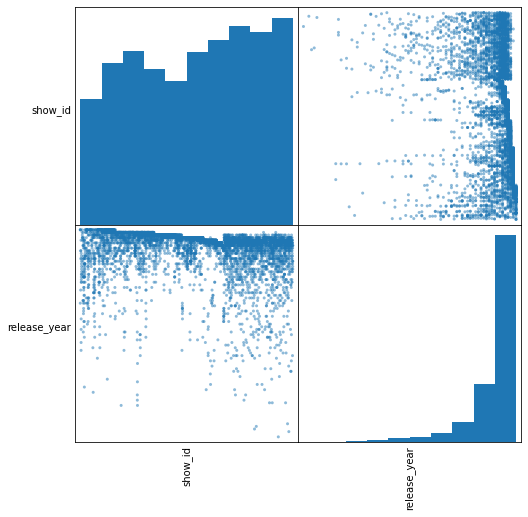

In [122]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [123]:
df = df.select('show_id', 'type', 'title', 'director', 'cast', 'Genre', 'country_split', 'country', 'date', 'date_added', 'release_year', 'rating', 'duration', 'listed_in')
cols = df.columns
df.printSchema()

root
 |-- show_id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- country_split: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)



In [124]:
# replace null values with "N/A"
df = df.na.fill({'country': 'N/A', 'country_split': 'N/A', 'listed_in': 'N/A', 'director': 'N/A', 'cast': 'N/A', 'Genre': 'N/A'})

In [125]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [126]:
categoricalColumns = ['type', 'title', 'director', 'cast', 'country_split', 'date', 'rating', 'listed_in']
stages = []

In [127]:
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [128]:
label_stringIdx = StringIndexer(inputCol = 'Genre', outputCol = 'label')
stages += [label_stringIdx]

In [129]:
numericCols = ['show_id', 'release_year']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [130]:
# create a pipeline

from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- show_id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = false)
 |-- cast: string (nullable = false)
 |-- Genre: string (nullable = false)
 |-- country_split: string (nullable = false)
 |-- country: string (nullable = false)
 |-- date: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = false)



In [131]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)

In [132]:
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 3765
Test Dataset Count: 1550


In [133]:
#Logistic Regression Model
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)


In [134]:
lrModel = lr.fit(train)

In [135]:
import matplotlib.pyplot as plt
import numpy as np


In [136]:
beta = np.sort(lrModel.coefficientMatrix.toArray())

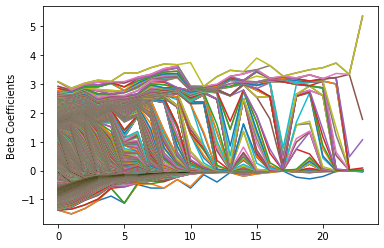

In [137]:

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [138]:
#Summarize the model over the training set
trainingSummary = lrModel.summary

In [139]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [140]:
#Print the coefficients and intercept for logistic regression
print("Coefficients: ${lrModel.coefficients} Intercept: ${lrModel.intercept}")

Coefficients: ${lrModel.coefficients} Intercept: ${lrModel.intercept}


In [141]:
# Obtain the objective per iteration.
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
2.1062467589611282
0.6316231421864068
0.06767558147246702
0.04475903139442506
0.0195967264177148
0.009739907553390242
0.004860485692819605
0.0024435778487328238
0.0012262486107524613
0.0006158782452842013
0.00030914620114175543


In [142]:
#Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.
print("Training set accuracy = %g" % trainingSummary.accuracy)

Training set accuracy = 1


In [143]:
# Make predictions.
predictions = lrModel.transform(test)
# Select example rows to display.
predictions.show(5)

+-----+--------------------+-------+-----+------------+---------------+--------------------+------+-------------+--------------------+----------+----------------+------------+------+--------+--------------------+--------------------+--------------------+----------+
|label|            features|show_id| type|       title|       director|                cast| Genre|country_split|             country|      date|      date_added|release_year|rating|duration|           listed_in|       rawPrediction|         probability|prediction|
+-----+--------------------+-------+-----+------------+---------------+--------------------+------+-------------+--------------------+----------+----------------+------------+------+--------+--------------------+--------------------+--------------------+----------+
|  0.0|(16299,[0,2,5550,...|   4523|Movie|      22-Jul|Paul Greengrass|Anders Danielsen ...|Dramas|       Norway|Norway, Iceland, ...|10/10/2018|October 10, 2018|        2018|     R| 144 min|   Dramas, 

In [144]:
# Make predictions with selected columns.
predictions = lrModel.transform(test)
predictions.select('type', 'title', 'Genre','label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+----------------+------+-----+--------------------+----------+--------------------+
| type|           title| Genre|label|       rawPrediction|prediction|         probability|
+-----+----------------+------+-----+--------------------+----------+--------------------+
|Movie|          22-Jul|Dramas|  0.0|[11.3935213432600...|       0.0|[0.99966796709288...|
|Movie|      100 Meters|Dramas|  0.0|[5.91232504161290...|       0.0|[0.75354848739738...|
|Movie|    12 ROUND GUN|Dramas|  0.0|[5.72750400988669...|       0.0|[0.83628785550549...|
|Movie|     18 Presents|Dramas|  0.0|[5.39964882233571...|       0.0|[0.78762029323510...|
|Movie|        2 Hearts|Dramas|  0.0|[5.71228650393810...|       0.0|[0.81044093689203...|
|Movie|        26 Years|Dramas|  0.0|[5.46265235976346...|       0.0|[0.80067230835986...|
|Movie|        365 Days|Dramas|  0.0|[5.97644017574208...|       0.0|[0.86802528285701...|
|Movie|          7 años|Dramas|  0.0|[5.94299103528235...|       0.0|[0.86731008845977...|

In [163]:
# Set the model threshold to maximize F-Measure
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction')
thresholds = np.linspace(0.01, 0.99, 100)

In [146]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error.

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = " + str(1.0 - accuracy))

Test Error = 0.11354838709677417


In [164]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('type', 'title','Genre', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+----------------+------+-----+--------------------+----------+--------------------+
| type|           title| Genre|label|       rawPrediction|prediction|         probability|
+-----+----------------+------+-----+--------------------+----------+--------------------+
|Movie|          22-Jul|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|      100 Meters|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|    12 ROUND GUN|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|     18 Presents|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|        2 Hearts|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|        26 Years|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|        365 Days|Dramas|  0.0|[826.0,799.0,554....|       0.0|[0.25942211055276...|
|Movie|          7 años|Dramas|  0.0|[244.0,0.0,0.0,0....|       0.0|[1.0,0.0,0.0,0.0,...|

In [168]:
# Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('type', 'title', 'Genre','label', 'rawPrediction', 'prediction', 'probability').show(10)


+-----+----------------+------+-----+--------------------+----------+--------------------+
| type|           title| Genre|label|       rawPrediction|prediction|         probability|
+-----+----------------+------+-----+--------------------+----------+--------------------+
|Movie|          22-Jul|Dramas|  0.0|[7.25958253217095...|       0.0|[0.36297912660854...|
|Movie|      100 Meters|Dramas|  0.0|[7.30404946601403...|       0.0|[0.36520247330070...|
|Movie|    12 ROUND GUN|Dramas|  0.0|[5.87574332683683...|       0.0|[0.29378716634184...|
|Movie|     18 Presents|Dramas|  0.0|[5.87574332683683...|       0.0|[0.29378716634184...|
|Movie|        2 Hearts|Dramas|  0.0|[5.82035212774897...|       0.0|[0.29101760638744...|
|Movie|        26 Years|Dramas|  0.0|[5.87574332683683...|       0.0|[0.29378716634184...|
|Movie|        365 Days|Dramas|  0.0|[5.87574332683683...|       0.0|[0.29378716634184...|
|Movie|          7 años|Dramas|  0.0|[5.87574332683683...|       0.0|[0.29378716634184...|

In [171]:
# confusion matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [172]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

In [173]:
['no', 'yes']

['no', 'yes']

In [195]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()
y_true = y_true["label"].values.tolist()

In [199]:
y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()
y_pred = y_pred["prediction"].values.tolist()

In [202]:
# calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[442   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [285  39   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [239   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [109   0   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [107   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 78   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  7   0   0   0   0   0

TypeError: object of type 'map' has no len()

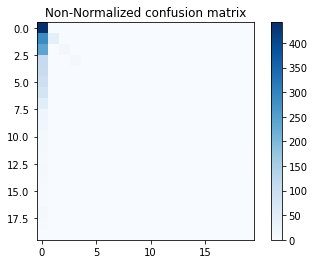

In [205]:
# plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=False,  title='Non-Normalized confusion matrix')
plt.show()

In [ ]:
# export to code to word
import win32com.client as win32
